# We want to find parameters that best fit a given function to a data set. Usually the data set is given to us but for now let's generate our own data sets.

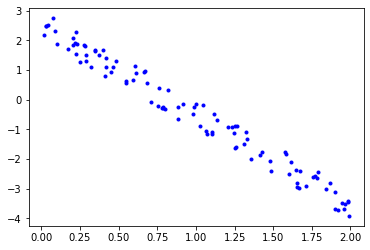

In [2]:
import numpy as np
from matplotlib import pyplot as plt
# generate a hundred random x points between zero and 2
x=2*np.random.rand(100,1)
# y=2-3x+noise. We add noise otherwise all data points will lie perfectly on y=2-3x 
y=2-3*x+np.random.rand(100,1)
# plot the data points
plt.plot(x,y,'b.')

# In real life we do not know our generating function:

However, we look that the data set above, and we are like it must be generated from a straight line, so we look for $\omega_0$ and $\omega_1$ in that make the straight line $y=\omega_0+\omega_1 x$ best fit the data. 

We already know a very good answer: $y=2-3x$ so $\omega_0=2$ and $\omega_1=-3$, but let's pretend we don't and try different values of parameters. 

- Try $\omega_0=1$ and $\omega_1=-2$ so plot $y=1-2x$ along with the above data.

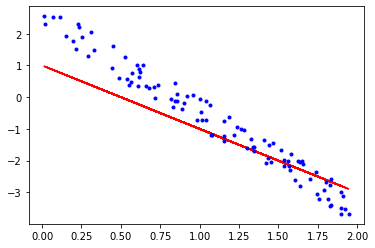

In [3]:
# Plot the line y=1-2x
plt.plot(x,1-2*x,'r')
# Plot the data points 
plt.plot(x,y,'b.')

# Now try to plot $y=2-3x$ in green and see that it is a much better fit

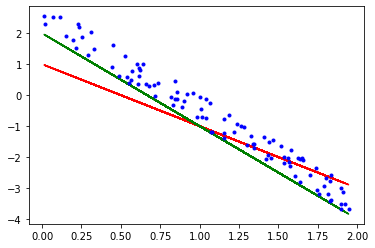

In [4]:
# Plot the line y=1-2x
plt.plot(x,1-2*x,'r')
# Plot the line y=2-3x
plt.plot(x,2-3*x,'g')
# Plot the data points 
plt.plot(x,y,'b.')

# Wait, why is it not such a good answer? 

It's true we generated the data from $y=2-3x$ but we added positive noise between $0$ and $1$ to it. So all the data points are above this line. Then obviously a better fit would be $y=2.5-3x$. Let's try it. 

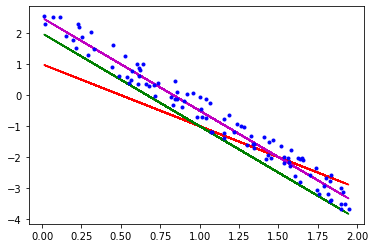

In [5]:
# Plot the line y=1-2x in red
plt.plot(x,1-2*x,'r')
# Plot the line y=2-3x in green
plt.plot(x,2-3*x,'g')
# Plot the line y=2.5-3x in magenta
plt.plot(x,2.5-3*x,'m')
# Plot the data points 
plt.plot(x,y,'b.')

# In applications we don't know the generating function:

So we make an educated guess about its form, in this case a straight line $y=w_0+w_1x$. This is the learning function. Then we try to find the parameters $w_0$ and $w_1$ that minimize an error function (called loss function) between the measurements (data points) and the straighline. 

# For linear regression, you use the mean square loss function $$L(\omega_0,\omega_1)=\frac{1}{n}\sum_{i=1}^n|\hat{y}_i-y_i|^2$$ and solve the following optimization problem

$$\min_{w_0,w_1}\frac{1}{n}\left(|\hat{y_1}-w_0-w_1x_1|^2+|\hat{y_2}-w_0-w_1x_2|^2+\dots +|\hat{y_n}-w_0-w_1x_n|^2\right)$$

## This says, find the parameters $\omega_0$ and $\omega_1$ that minimize the average square distance between the measured $\hat{y}$ and the hypothesized $y=\omega_0+\omega_1x$.

The minimum happens at points where $$\nabla(L(\omega_0,\omega_1))=\begin{pmatrix}\frac{\partial L}{\partial \omega_0}\\\frac{\partial L}{\partial \omega_1}\end{pmatrix}=\begin{pmatrix}0\\0\end{pmatrix}$$

# Let's see how large this problem is:

We have a hundred data points, so $L(\omega_0,\omega_1)$ has a hundred terms in it, and we compute its partial derivative with respect to each parameter, so we have to compute $200$ partial derivatives, each of the has at least a hundred arithmetic operations. So while searching for the minimum each step will include at least $20000$ operations, and that is only using $100$ data points! Imagine now you had $70,000$ data points, each data point is high dimensional, and you had $20,000$ parameters, so you have to compute $20,000$ partial derivatives, with at least $70,000$ arithmetic operations in your derivatives. You must immediately stop and look for ways to dramtically reduce the size of your computation. Luckily there are many ways around this.  

# Before we do Stochastic Gradient Descent or Mini-Batch gradient descent, let's generate a nonlinear data set and fit it to a gaussian function 

The Gaussian function (nonlinear) has two parameters, the mean $\mu$ and the standard deviation $\sigma$: $$y=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

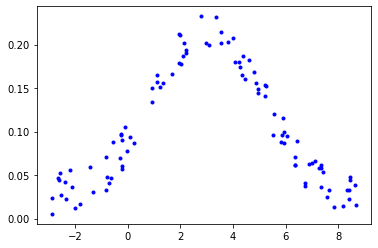

In [3]:
# Gaussian function plus noise. 
mu=3
sigma=2
x=-3+12*np.random.rand(100,1)
y=np.exp(-0.5*(x-mu)**2/sigma**2)/(sigma*np.sqrt(2*np.pi))+0.05*np.random.rand(100,1)
# plot the data points
plt.plot(x,y,'b.')

# Let's cheat and immediately fit it with the learning function that we know will work
$$y=0.025+\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$ with $\sigma=2$ and $\mu=3$

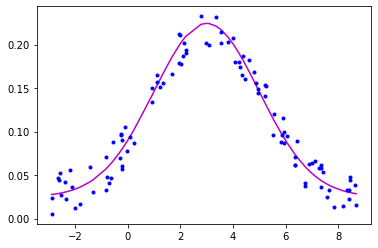

In [4]:
# since this function is nonlinear I will sort the randomly generated x points first 
xx=np.sort(x, axis=None)
# fitting function formula
z=0.025+np.exp(-0.5*(xx-mu)**2/sigma**2)/(sigma*np.sqrt(2*np.pi))
# plot the fitting function
plt.plot(xx,z,'m')
# plot the data points
plt.plot(x,y,'b.')

# Note that even though we know the generating function, if we only had partial view of the data, it is very hard to guess what non-linear function it was generated from! Here's a parial view of the above data, with reduced noise level:

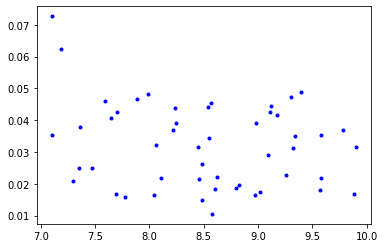

In [7]:
x=7+3*np.random.rand(50,1)
# Gaussian function plus noise, over x in [4,7]. 
mu=3
sigma=2
y=np.exp(-0.5*(x-mu)**2/sigma**2)/(sigma*np.sqrt(2*np.pi))+0.05*np.random.rand(50,1)
# plot the data points
plt.plot(x,y,'b.')

## Look at the picture above. It's not clear this is a part of a Gaussian function. We can try to fit it to a gaussian, and see if it generalizes well to the test data. But for each data set are we going to just sit there are try to fit it to every nonlinear function out there? 

# This is where neural networks come to the rescue. 

Recall when we passed an image (or data) through a neural network, we had a linear combination of the input data composed with a simple nonlinear function $f$. This simple nonlinear $f$ is called the activation function. 

The output of one neuron looks like:

$$f(\omega_0+\omega_1\mathbf{x}+\omega_3\mathbf{x}+\dots+\omega_n\mathbf{x})$$

But in a whole network, we have multiple layers with multiple neurons in each layer. So when you combine all these neurons together, by some miracle, you get a very good approximation of a wide range of unknown generating functions! The success measure is that the resulting learning function generalizes well to unseen data, meaning data it was not trained on, that is, data points that did not go into the loss function while performing the minimization to solve for the $\omega$'s.

There is plenty of space in math research on why these functions made up of a series of linear combinations composed with nonlinear activation functions work so well.

The way I think about it is similar to why Taylor polynomials approximate a wide range of functions (namely analytic fucntions) so well. 